<a href="https://colab.research.google.com/github/srujan-b/Assignment-2-Choose-Your-Own-Analysis/blob/main/Validating-Synthetic-Models-as-Surgical-Training-Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extract the videos

This Python code extracts the contents of a ZIP file ("videos_imra.zip") to a specified directory ("/content/drive/MyDrive/ColabNotebooks/videos_imra/"). It includes error handling to check for ZIP file corruption.

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/ColabNotebooks/videos_imra.zip'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/drive/MyDrive/ColabNotebooks/videos_imra/')  # Change the target directory as needed
    print("Extraction successful.")
except zipfile.BadZipFile:
    print("The ZIP file appears to be corrupted.")


Extraction successful.


# Main Code

## Library Import

These three lines of code import essential libraries for deep learning (PyTorch and torchvision) and computer vision (OpenCV), setting the foundation for image processing and machine learning tasks.

In [2]:
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib
import seaborn
import pandas as pd
import yaml
import cv2
import os
from IPython.display import display, HTML
import imageio

This line of code reads a CSV file named "imra_suturing_dataset.csv" located in the specified path into a Pandas DataFrame named "df" for further data manipulation and analysis.

## IMport df

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/imra_suturing_dataset.csv')

In [ ]:
df.head()

,ID,Typeofsuturing,videofilepath,videofilename,Category
0,AMRA001,Suturing,/videos_imra/Suturing/Novice/,Novice_dV_001_suture.mp4,Novice
1,AMRA001,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_001_interupted.mp4,Novice
2,AMRA006,Suturing,/videos_imra/Suturing/Novice/,Novice_dv_006_suture.mp4,Novice
3,AMRA006,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_006_interupted.mp4,Novice
4,AMRA007,Suturing,/videos_imra/Suturing/Novice/,Novice_dv_007_suture.mp4,Novice


This code iterates through rows in a Pandas DataFrame named 'df' and for each row, it checks and extracts properties (width, height, frame rate, and duration) of a video file specified in the DataFrame, then adds these properties to the DataFrame. If the video file is not found, it marks the properties as 'N/A' and prints a message about the missing file. This process is useful for video analysis and metadata extraction.

In [ ]:
import cv2
import pandas as pd
import os

# Define the prefix to be added to all file paths
prefix = "/content/drive/MyDrive/ColabNotebooks/videos_imra/"  # Replace with your actual prefix

# Assuming your DataFrame is named 'df'
for index, row in df.iterrows():
    # Construct video path
    video_path = prefix + row['videofilepath'].lstrip('./') + row['videofilename']

    # Check if the video file exists at the specified location
    if os.path.exists(video_path):
        # Open the video file
        video = cv2.VideoCapture(video_path)

        # Extract video dimensions
        width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # Extract frame rate (frames per second)
        fps = video.get(cv2.CAP_PROP_FPS)

        # Extract the duration (time) of the video in seconds
        frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        duration_sec = frame_count / fps

        # Add the extracted properties to the DataFrame
        df.at[index, 'Video_Width'] = width
        df.at[index, 'Video_Height'] = height
        df.at[index, 'Frame_Rate'] = fps
        df.at[index, 'Duration_Sec'] = duration_sec

        # Release the video capture
        video.release()
    else:
        # Video file not found at the specified location
        df.at[index, 'Video_Width'] = 'N/A'
        df.at[index, 'Video_Height'] = 'N/A'
        df.at[index, 'Frame_Rate'] = 'N/A'
        df.at[index, 'Duration_Sec'] = 'N/A'
        print(f"Video not found at location: {video_path}")




In [ ]:
df[df['Category'] == 'Expert'].head()

,ID,Typeofsuturing,videofilepath,videofilename,Category,Video_Width,Video_Height,Frame_Rate,Duration_Sec
6,AMRA008,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_008_suture.mp4,Expert,1548.0,1080.0,30.0,194.066667
7,AMRA008,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_008_interupted.mp4,Expert,1532.0,1080.0,30.0,102.533333
8,AMRA010,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_010_suture.mp4,Expert,1548.0,1080.0,30.0,77.533333
9,AMRA011,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_010_interupted.mp4,Expert,1532.0,1080.0,30.0,95.466667


This code uses Matplotlib to create a bar chart showing the total video duration for each category in the DataFrame 'df' and labels the plot appropriately for visualizing combined suturing and interrupted suturing video categories.

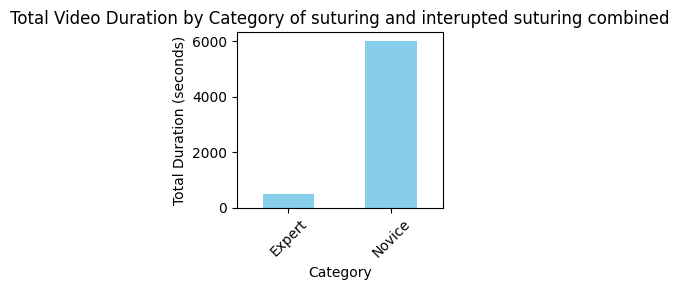

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Category' and calculate the sum of duration_sec for each category
category_duration = df.groupby('Category')['Duration_Sec'].sum()

# Plotting the data
plt.figure(figsize=(3, 3))
category_duration.plot(kind='bar', color='skyblue')
plt.title('Total Video Duration by Category of suturing and interupted suturing combined')
plt.xlabel('Category')
plt.ylabel('Total Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
data = {
    'ID': ['AMRA001', 'AMRA001', 'AMRA008', 'AMRA008'],
    'Typeofsuturing': ['Suturing', 'intreputedSuturing', 'Suturing', 'intreputedSuturing'],
    'videofilepath': ['/videos_imra/Suturing/Novice/', '/videos_imra/intreputedSuturing/Novice/', '/videos_imra/Suturing/Expert/', '/videos_imra/intreputedSuturing/Expert/'],
    'videofilename': ['Novice_dV_001_suture.mp4', 'Novice_dV_001_interupted.mp4', 'Expert_dV_008_suture.mp4', 'Expert_dV_008_interupted.mp4'],
    'Category': ['Novice', 'Novice', 'Expert', 'Expert']
}
df = pd.DataFrame(data)

df.head()

,ID,Typeofsuturing,videofilepath,videofilename,Category
0,AMRA001,Suturing,/videos_imra/Suturing/Novice/,Novice_dV_001_suture.mp4,Novice
1,AMRA001,intreputedSuturing,/videos_imra/intreputedSuturing/Novice/,Novice_dV_001_interupted.mp4,Novice
2,AMRA008,Suturing,/videos_imra/Suturing/Expert/,Expert_dV_008_suture.mp4,Expert
3,AMRA008,intreputedSuturing,/videos_imra/intreputedSuturing/Expert/,Expert_dV_008_interupted.mp4,Expert


## Video resizing and stablization

This code performs video processing on a set of videos listed in a DataFrame 'df'. It resizes the videos to a specified width and height, applies video stabilization using feature matching and frame alignment, and saves the processed videos to an output directory. The code also checks for existing processed videos to avoid reprocessing.

In [ ]:
# Set the desired width and height (224x224 pixels)
width = 224
height = 224

# Set the desired frame rate (30 fps)
frame_rate = 30

# Define the prefix for saving processed videos
prefix = "/content/drive/MyDrive/ColabNotebooks/videos_imra"  # Replace with your prefix

# Define a function to perform feature matching between frames
def feature_matching(prev_frame, current_frame):
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(prev_frame, None)
    kp2, des2 = orb.detectAndCompute(current_frame, None)

    # Create BFMatcher (Brute Force Matcher) object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort them in ascending order of distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Get good matches
    good_matches = matches[:20]  # Adjust the number of matches as needed

    if len(good_matches) >= 4:
        # Extract location of good matches
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Estimate affine transformation using RANSAC
        M, _ = cv2.estimateAffine2D(src_pts, dst_pts, cv2.RANSAC)

        return M

    return None

# Iterate through the DataFrame and process each video
for index, row in df.iterrows():
    input_video_path = prefix + row['videofilepath'] + row['videofilename']
    output_video_path = prefix + '/pixel_reduced' + row['videofilepath'] + row['videofilename']

    # Check if the output directory exists, and create it if not
    output_dir = os.path.dirname(output_video_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Check if the output video file already exists, and skip processing if it does
    if not os.path.exists(output_video_path):
        print(f"Processing video: {input_video_path}")

        # Open the input video file
        cap = cv2.VideoCapture(input_video_path)

        # Get the original video's frame width, height, and frame rate
        original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        original_frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

        # Create a VideoWriter object to save the processed video
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
        out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height), isColor=True)

        # Initialize variables for video stabilization
        prev_frame = None

        while True:
            ret, frame = cap.read()

            if not ret:
                break

            # Resize the frame to the desired width and height
            frame = cv2.resize(frame, (width, height))

            # Convert the frame to grayscale
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Video stabilization using feature matching and frame alignment
            if prev_frame is not None:
                # Estimate the motion transformation matrix
                M = feature_matching(prev_frame, gray_frame)

                if M is not None:
                    # Apply the estimated transformation to the current frame
                    result_frame = cv2.warpAffine(frame, M, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))
                else:
                    result_frame = frame  # If no transformation, keep the frame as is
            else:
                result_frame = frame  # First frame, no stabilization

            # Write the resulting frame to the output video
            out.write(result_frame)

            # Update the previous frame
            prev_frame = gray_frame

        # Release video objects
        cap.release()
        out.release()
        print(f"Video processed and saved to: {output_video_path}")
    else:
        print(f"Video already processed: {output_video_path}")

# Destroy any OpenCV windows if open
cv2.destroyAllWindows()


Processing video: /content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Novice/Novice_dV_001_suture.mp4
Video processed and saved to: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/Suturing/Novice/Novice_dV_001_suture.mp4
Processing video: /content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/intreputedSuturing/Novice/Novice_dV_001_interupted.mp4
Video processed and saved to: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/intreputedSuturing/Novice/Novice_dV_001_interupted.mp4
Processing video: /content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/Suturing/Expert/Expert_dV_008_suture.mp4
Video processed and saved to: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/Suturing/Expert/Expert_dV_008_suture.mp4
Processing video: /content/drive/MyDrive/ColabNotebooks/videos_imra/videos_imra/intreputedSuturing/Expert/Expert_dV_008_interupted.mp4
Video processed and saved to: /co

## Converting to frames and getting optical flow info

The provided Python code extracts frames and optical flow from video files and saves them as image files. Here's a summary of the code's functionality:

1. The code takes a video file as input and opens it for processing.

2. It calculates the original frame rate of the video.

3. An output directory is created to store the extracted frames and optical flow images.

4. The code uses the TV-L1 optical flow algorithm to calculate optical flow between consecutive frames in the video.

5. Frames are resized to a specified dimension (224x224 in this example) if needed.

6. Frames are saved as color images (BGR) without converting them to grayscale.

7. Optical flow is computed and saved as separate flow_x and flow_y components.

8. The code processes the video, skipping frames to match the desired frame rate specified (default is 10 frames per second).

9. The processed video is released, and the code completes its execution.

The modified code ensures that the frames are saved in color, preserving the original BGR color information. This code can be useful for various computer vision and video analysis tasks that require frame and optical flow data in color format.

In [4]:
data = {
    'ID': [ 'AMRA008'],
    'Typeofsuturing': ['intreputedSuturing'],
    'videofilepath': [ '/videos_imra/intreputedSuturing/Expert/'],
    'videofilename': [ 'Expert_dV_008_interupted.mp4'],
    'Category': ['Expert']
}
df = pd.DataFrame(data)

In [ ]:
import cv2
import os
from multiprocessing import Pool

def extract_frames_and_optical_flow(video_path, output_directory, frame_rate=10):



    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the original frame rate
    original_frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    print(f"Original frame rate: {original_frame_rate} FPS")

    # Extract the video file name without extension
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Create an output directory for frames
    frames_directory = os.path.join(output_directory, "frames", video_name)
    os.makedirs(frames_directory, exist_ok=True)
    print(f"Frames directory: {frames_directory}")

    # Create an output directory for optical flow images
    optical_flow_directory = os.path.join(output_directory,"opticalFlow", video_name)
    os.makedirs(optical_flow_directory, exist_ok=True)
    print(f"Optical flow directory: {optical_flow_directory}")

    # Initialize variables for TV-L1 optical flow
    prev_frame = None
    optical_flow = cv2.optflow.createOptFlow_DualTVL1()

    frame_count = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Resize the frame if needed
        frame_resized = cv2.resize(frame, (224, 224))  # Change dimensions as needed

        if prev_frame is not None:
            # Calculate TV-L1 optical flow
            flow = optical_flow.calc(cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY),
                                     cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY), None)

            # Save the optical flow as separate x and y components
            flow_x = flow[..., 0]
            flow_y = flow[..., 1]

            flow_x_path = os.path.join(optical_flow_directory, f'flow_x_{frame_count:05d}.jpg')
            flow_y_path = os.path.join(optical_flow_directory, f'flow_y_{frame_count:05d}.jpg')

            cv2.imwrite(flow_x_path, flow_x)
            cv2.imwrite(flow_y_path, flow_y)

        frame_path = os.path.join(frames_directory, f'frame_{frame_count:05d}.jpg')
        cv2.imwrite(frame_path, frame)

        frame_count += 1

        # Set the previous frame for the next iteration
        prev_frame = frame_resized

        # Skip frames to match the desired frame rate
        skip_frames = int(original_frame_rate / frame_rate) - 1
        for _ in range(skip_frames):
            ret, _ = cap.read()
            if not ret:
                break

    # Release video object
    cap.release()
    print(f"Video processing complete for {video_name}")

if __name__ == "__main__":
    # Set the prefix to your provided path
    prefix = "/content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced"

    # Create a list of video information tuples
    video_info_list = [
        (
            f"{prefix}{row['videofilepath']}{row['videofilename']}",
            f"{prefix}{row['videofilepath']}",
            30 if "expert" in row['videofilename'].lower() else 10
        ) for index, row in df.iterrows()
    ]

    # Set the number of CPU cores to use for multiprocessing
    num_cpus = os.cpu_count()
    print(f"Number of CPU cores: {num_cpus}")

    # Create a multiprocessing pool and map the function to process videos
    with Pool(num_cpus) as pool:
        pool.starmap(extract_frames_and_optical_flow, video_info_list)


[('/content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/intreputedSuturing/Expert/Expert_dV_008_interupted.mp4', '/content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/intreputedSuturing/Expert/', 30)]
Number of CPU cores: 40
Original frame rate: 30 FPS
Frames directory: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/intreputedSuturing/Expert/frames/Expert_dV_008_interupted
Optical flow directory: /content/drive/MyDrive/ColabNotebooks/videos_imra/pixel_reduced/videos_imra/intreputedSuturing/Expert/opticalFlow/Expert_dV_008_interupted


In [ ]:
# Experiment

task_choices = ['Suturing', 'Needle_Passing', 'Knot_Tying']
task = 'Suturing'  # Default task

eval_scheme_choices = ['LOSO', 'LOUO']
eval_scheme = 'LOSO'  # Default evaluation scheme

split = None  # Define the appropriate value

modality_choices = ['RGB', 'Flow']
modality = 'RGB'  # Default modality

# Data

data_path = "?"  # Replace "?" with the actual path
video_lists_dir = "./Splits/{}/"  # Replace "{}" with the actual values
video_sampling_step = 3  # Default video sampling step
three_channel_flow = False  # Default value
do_horizontal_flip = True  # Default value
data_preloading = True  # Default value

# Model

num_cls_Kinetics = 400

snippet_length = 64  # Default value
dropout = 0.7  # Default value
num_segments = 10  # Default value
pretrain_path = None  # Default value

# Training

workers = 4  # Default value
epochs = 1200  # Default value
batch_size = 2  # Default value
lr = 0.00001  # Default value
eval_freq = 10  # Default value
save_freq = 100  # Default value
output_path = "?"  # Replace "?" with the actual path


In [6]:
import os.path
import datetime
import string
import torch
from torch import nn

In [5]:
import torch

class ConsensusModule(torch.nn.Module):
    def __init__(self, dim=1):
        super(ConsensusModule, self).__init__()
        self.dim = dim
        self.shape = None

    def forward(self, input_tensor):
        self.shape = input_tensor.size()
        output = input_tensor.mean(dim=self.dim, keepdim=True)
        return output

    def backward(self, grad_output):
        grad_in = grad_output.expand(self.shape) / float(self.shape[self.dim])
        return grad_in


The provided code defines the architecture of the Inception I3D (Inception-v1) model, which is a deep convolutional neural network used for action recognition in videos. This model is a modified version of the Inception architecture, designed specifically for 3D video data. Here are the key components of the code:

1. **MaxPool3dSamePadding:** This is a custom MaxPool3D layer with padding that ensures the output size matches the input size spatially. It calculates padding dynamically based on the input and stride, ensuring that the spatial dimensions are preserved.

2. **Unit3D:** This class defines a basic 3D convolutional unit with options for batch normalization, activation functions, and bias usage. It is a fundamental building block used in the Inception I3D model.

3. **InceptionModule:** This module represents an Inception module, which is a combination of 3D convolutional filters with different kernel sizes. It is used to capture features at multiple scales in the video data.

4. **InceptionI3d:** The main Inception I3D model is constructed here. It consists of multiple Inception modules, max-pooling layers, and a final classification layer. The model can be configured for a specific number of output classes, and it includes dropout for regularization.

5. **Forward and Feature Extraction:** The forward pass of the model is defined, which computes the logits for classification. Additionally, a feature extraction method is provided to extract features from intermediate layers of the model.

In summary, this code defines the architecture of the Inception I3D model, a powerful deep learning model for video-based action recognition. It can be used for tasks such as recognizing human actions in videos or analyzing video data in various applications.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np



class MaxPool3dSamePadding(nn.MaxPool3d):

    def compute_pad(self, dim, s):
        if s % self.stride[dim] == 0:
            return max(self.kernel_size[dim] - self.stride[dim], 0)
        else:
            return max(self.kernel_size[dim] - (s % self.stride[dim]), 0)

    def forward(self, x):
        # compute 'same' padding
        (batch, channel, t, h, w) = x.size()
        #print t,h,w
        out_t = np.ceil(float(t) / float(self.stride[0]))
        out_h = np.ceil(float(h) / float(self.stride[1]))
        out_w = np.ceil(float(w) / float(self.stride[2]))
        #print out_t, out_h, out_w
        pad_t = self.compute_pad(0, t)
        pad_h = self.compute_pad(1, h)
        pad_w = self.compute_pad(2, w)
        #print pad_t, pad_h, pad_w

        pad_t_f = pad_t // 2
        pad_t_b = pad_t - pad_t_f
        pad_h_f = pad_h // 2
        pad_h_b = pad_h - pad_h_f
        pad_w_f = pad_w // 2
        pad_w_b = pad_w - pad_w_f

        pad = (pad_w_f, pad_w_b, pad_h_f, pad_h_b, pad_t_f, pad_t_b)
        #print x.size()
        #print pad
        x = F.pad(x, pad)
        return super(MaxPool3dSamePadding, self).forward(x)


class Unit3D(nn.Module):

    def __init__(self, in_channels,
                 output_channels,
                 kernel_shape=(1, 1, 1),
                 stride=(1, 1, 1),
                 padding=0,
                 activation_fn=F.relu,
                 use_batch_norm=True,
                 use_bias=False,
                 name='unit_3d'):

        """Initializes Unit3D module."""
        super(Unit3D, self).__init__()

        self._output_channels = output_channels
        self._kernel_shape = kernel_shape
        self._stride = stride
        self._use_batch_norm = use_batch_norm
        self._activation_fn = activation_fn
        self._use_bias = use_bias
        self.name = name
        self.padding = padding

        self.conv3d = nn.Conv3d(in_channels=in_channels,
                                out_channels=self._output_channels,
                                kernel_size=self._kernel_shape,
                                stride=self._stride,
                                padding=0, # we always want padding to be 0 here. We will dynamically pad based on input size in forward function
                                bias=self._use_bias)

        if self._use_batch_norm:
            self.bn = nn.BatchNorm3d(self._output_channels, eps=0.001, momentum=0.01)

    def compute_pad(self, dim, s):
        if s % self._stride[dim] == 0:
            return max(self._kernel_shape[dim] - self._stride[dim], 0)
        else:
            return max(self._kernel_shape[dim] - (s % self._stride[dim]), 0)


    def forward(self, x):
        # compute 'same' padding
        (batch, channel, t, h, w) = x.size()
        #print t,h,w
        out_t = np.ceil(float(t) / float(self._stride[0]))
        out_h = np.ceil(float(h) / float(self._stride[1]))
        out_w = np.ceil(float(w) / float(self._stride[2]))
        #print out_t, out_h, out_w
        pad_t = self.compute_pad(0, t)
        pad_h = self.compute_pad(1, h)
        pad_w = self.compute_pad(2, w)
        #print pad_t, pad_h, pad_w

        pad_t_f = pad_t // 2
        pad_t_b = pad_t - pad_t_f
        pad_h_f = pad_h // 2
        pad_h_b = pad_h - pad_h_f
        pad_w_f = pad_w // 2
        pad_w_b = pad_w - pad_w_f

        pad = (pad_w_f, pad_w_b, pad_h_f, pad_h_b, pad_t_f, pad_t_b)
        #print x.size()
        #print pad
        x = F.pad(x, pad)
        #print x.size()

        x = self.conv3d(x)
        if self._use_batch_norm:
            x = self.bn(x)
        if self._activation_fn is not None:
            x = self._activation_fn(x)
        return x



class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_channels, name):
        super(InceptionModule, self).__init__()

        self.b0 = Unit3D(in_channels=in_channels, output_channels=out_channels[0], kernel_shape=[1, 1, 1], padding=0,
                         name=name+'/Branch_0/Conv3d_0a_1x1')
        self.b1a = Unit3D(in_channels=in_channels, output_channels=out_channels[1], kernel_shape=[1, 1, 1], padding=0,
                          name=name+'/Branch_1/Conv3d_0a_1x1')
        self.b1b = Unit3D(in_channels=out_channels[1], output_channels=out_channels[2], kernel_shape=[3, 3, 3],
                          name=name+'/Branch_1/Conv3d_0b_3x3')
        self.b2a = Unit3D(in_channels=in_channels, output_channels=out_channels[3], kernel_shape=[1, 1, 1], padding=0,
                          name=name+'/Branch_2/Conv3d_0a_1x1')
        self.b2b = Unit3D(in_channels=out_channels[3], output_channels=out_channels[4], kernel_shape=[3, 3, 3],
                          name=name+'/Branch_2/Conv3d_0b_3x3')
        self.b3a = MaxPool3dSamePadding(kernel_size=[3, 3, 3],
                                stride=(1, 1, 1), padding=0)
        self.b3b = Unit3D(in_channels=in_channels, output_channels=out_channels[5], kernel_shape=[1, 1, 1], padding=0,
                          name=name+'/Branch_3/Conv3d_0b_1x1')
        self.name = name

    def forward(self, x):
        b0 = self.b0(x)
        b1 = self.b1b(self.b1a(x))
        b2 = self.b2b(self.b2a(x))
        b3 = self.b3b(self.b3a(x))
        return torch.cat([b0,b1,b2,b3], dim=1)


class InceptionI3d(nn.Module):
    """Inception-v1 I3D architecture.
    The model is introduced in:
        Quo Vadis, Action Recognition? A New Model and the Kinetics Dataset
        Joao Carreira, Andrew Zisserman
        https://arxiv.org/pdf/1705.07750v1.pdf.
    See also the Inception architecture, introduced in:
        Going deeper with convolutions
        Christian Szegedy, Wei Liu, Yangqing Jia, Pierre Sermanet, Scott Reed,
        Dragomir Anguelov, Dumitru Erhan, Vincent Vanhoucke, Andrew Rabinovich.
        http://arxiv.org/pdf/1409.4842v1.pdf.
    """

    # Endpoints of the model in order. During construction, all the endpoints up
    # to a designated `final_endpoint` are returned in a dictionary as the
    # second return value.
    VALID_ENDPOINTS = (
        'Conv3d_1a_7x7',
        'MaxPool3d_2a_3x3',
        'Conv3d_2b_1x1',
        'Conv3d_2c_3x3',
        'MaxPool3d_3a_3x3',
        'Mixed_3b',
        'Mixed_3c',
        'MaxPool3d_4a_3x3',
        'Mixed_4b',
        'Mixed_4c',
        'Mixed_4d',
        'Mixed_4e',
        'Mixed_4f',
        'MaxPool3d_5a_2x2',
        'Mixed_5b',
        'Mixed_5c',
        'Logits',
        'Predictions',
    )

    def __init__(self, num_classes=400, spatial_squeeze=True,
                 final_endpoint='Logits', name='inception_i3d', in_channels=3, dropout_keep_prob=0.5):
        """Initializes I3D model instance.
        Args:
          num_classes: The number of outputs in the logit layer (default 400, which
              matches the Kinetics dataset).
          spatial_squeeze: Whether to squeeze the spatial dimensions for the logits
              before returning (default True).
          final_endpoint: The model contains many possible endpoints.
              `final_endpoint` specifies the last endpoint for the model to be built
              up to. In addition to the output at `final_endpoint`, all the outputs
              at endpoints up to `final_endpoint` will also be returned, in a
              dictionary. `final_endpoint` must be one of
              InceptionI3d.VALID_ENDPOINTS (default 'Logits').
          name: A string (optional). The name of this module.
        Raises:
          ValueError: if `final_endpoint` is not recognized.
        """

        if final_endpoint not in self.VALID_ENDPOINTS:
            raise ValueError('Unknown final endpoint %s' % final_endpoint)

        super(InceptionI3d, self).__init__()
        self._num_classes = num_classes
        self._spatial_squeeze = spatial_squeeze
        self._final_endpoint = final_endpoint
        self.logits = None

        if self._final_endpoint not in self.VALID_ENDPOINTS:
            raise ValueError('Unknown final endpoint %s' % self._final_endpoint)

        self.end_points = {}
        end_point = 'Conv3d_1a_7x7'
        self.end_points[end_point] = Unit3D(in_channels=in_channels, output_channels=64, kernel_shape=[7, 7, 7],
                                            stride=(2, 2, 2), padding=(3,3,3),  name=name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'MaxPool3d_2a_3x3'
        self.end_points[end_point] = MaxPool3dSamePadding(kernel_size=[1, 3, 3], stride=(1, 2, 2),
                                                             padding=0)
        if self._final_endpoint == end_point: return

        end_point = 'Conv3d_2b_1x1'
        self.end_points[end_point] = Unit3D(in_channels=64, output_channels=64, kernel_shape=[1, 1, 1], padding=0,
                                       name=name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'Conv3d_2c_3x3'
        self.end_points[end_point] = Unit3D(in_channels=64, output_channels=192, kernel_shape=[3, 3, 3], padding=1,
                                       name=name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'MaxPool3d_3a_3x3'
        self.end_points[end_point] = MaxPool3dSamePadding(kernel_size=[1, 3, 3], stride=(1, 2, 2),
                                                             padding=0)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_3b'
        self.end_points[end_point] = InceptionModule(192, [64,96,128,16,32,32], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_3c'
        self.end_points[end_point] = InceptionModule(256, [128,128,192,32,96,64], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'MaxPool3d_4a_3x3'
        self.end_points[end_point] = MaxPool3dSamePadding(kernel_size=[3, 3, 3], stride=(2, 2, 2),
                                                             padding=0)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_4b'
        self.end_points[end_point] = InceptionModule(128+192+96+64, [192,96,208,16,48,64], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_4c'
        self.end_points[end_point] = InceptionModule(192+208+48+64, [160,112,224,24,64,64], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_4d'
        self.end_points[end_point] = InceptionModule(160+224+64+64, [128,128,256,24,64,64], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_4e'
        self.end_points[end_point] = InceptionModule(128+256+64+64, [112,144,288,32,64,64], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_4f'
        self.end_points[end_point] = InceptionModule(112+288+64+64, [256,160,320,32,128,128], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'MaxPool3d_5a_2x2'
        self.end_points[end_point] = MaxPool3dSamePadding(kernel_size=[2, 2, 2], stride=(2, 2, 2),
                                                             padding=0)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_5b'
        self.end_points[end_point] = InceptionModule(256+320+128+128, [256,160,320,32,128,128], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'Mixed_5c'
        self.end_points[end_point] = InceptionModule(256+320+128+128, [384,192,384,48,128,128], name+end_point)
        if self._final_endpoint == end_point: return

        end_point = 'Logits'
        self.avg_pool = nn.AvgPool3d(kernel_size=[2, 7, 7],
                                     stride=(1, 1, 1))
        self.dropout = nn.Dropout(dropout_keep_prob)
        self.logits = Unit3D(in_channels=384+384+128+128, output_channels=self._num_classes,
                             kernel_shape=[1, 1, 1],
                             padding=0,
                             activation_fn=None,
                             use_batch_norm=False,
                             use_bias=True,
                             name='logits')

        self.build()


    def replace_logits(self, num_classes):
        self._num_classes = num_classes
        self.logits = Unit3D(in_channels=384+384+128+128, output_channels=self._num_classes,
                             kernel_shape=[1, 1, 1],
                             padding=0,
                             activation_fn=None,
                             use_batch_norm=False,
                             use_bias=True,
                             name='logits')

    def set_dropout(self, dropout):
        self.dropout = nn.Dropout(p=dropout)

    def build(self):
        for k in self.end_points.keys():
            self.add_module(k, self.end_points[k])

    def forward(self, x):
        for end_point in self.VALID_ENDPOINTS:
            if end_point in self.end_points:
                x = self._modules[end_point](x) # use _modules to work with dataparallel

        x = self.logits(self.dropout(self.avg_pool(x)))
        if self._spatial_squeeze:
            logits = x.squeeze(3).squeeze(3)  # tensor B x C x T

        # avgpooling along temporal dimension
        logits = torch.mean(logits, 2)

        return logits


    def extract_features(self, x):
        for end_point in self.VALID_ENDPOINTS:
            if end_point in self.end_points:
                x = self._modules[end_point](x)
        return self.avg_pool(x)
